### **Import libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### **Merge all the statistics from different regions**

In [3]:
test_df = pd.read_csv("D:\\DA Portfolio\\Youtube-trending-videos\\data\\BR_youtube_trending_data.csv")
test_df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e..."
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...
2,3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10T14:59:00Z,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...
3,gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11T15:00:09Z,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,20,2020-08-12T00:00:00Z,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,242,2748,https://i.ytimg.com/vi/gBjox7vn3-g/default.jpg,False,False,Você se unirá aos Lunari e aos Solari em Targo...
4,npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11T20:04:02Z,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,23,2020-08-12T00:00:00Z,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,3972,2751,https://i.ytimg.com/vi/npoUGx7UW7o/default.jpg,False,False,Danilo Gentili recebe Thammy Miranda. Após pas...


In [4]:
files = [file for file in os.listdir('D:\\DA Portfolio\\Youtube-trending-videos\\data')]

df = pd.DataFrame()

for file in files:
    temp_df = pd.read_csv("D:\\DA Portfolio\\Youtube-trending-videos\\data\\" + file)
    temp_df['country'] = file[0:2]
    df = pd.concat([df, temp_df])

df.to_csv("D:\\DA Portfolio\\Youtube-trending-videos\\full_data.csv", index=False)


### **Data overview**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1118362 entries, 0 to 102590
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   video_id           1118362 non-null  object
 1   title              1118362 non-null  object
 2   publishedAt        1118362 non-null  object
 3   channelId          1118362 non-null  object
 4   channelTitle       1118361 non-null  object
 5   categoryId         1118362 non-null  int64 
 6   trending_date      1118362 non-null  object
 7   tags               1118362 non-null  object
 8   view_count         1118362 non-null  int64 
 9   likes              1118362 non-null  int64 
 10  dislikes           1118362 non-null  int64 
 11  comment_count      1118362 non-null  int64 
 12  thumbnail_link     1118362 non-null  object
 13  comments_disabled  1118362 non-null  bool  
 14  ratings_disabled   1118362 non-null  bool  
 15  description        1090616 non-null  object
 16  c

In [6]:
df.isnull().sum()

video_id                 0
title                    0
publishedAt              0
channelId                0
channelTitle             1
categoryId               0
trending_date            0
tags                     0
view_count               0
likes                    0
dislikes                 0
comment_count            0
thumbnail_link           0
comments_disabled        0
ratings_disabled         0
description          27746
country                  0
dtype: int64

We can see that there are 1 null value in the channelTilte column and a lot of null values in the description column. To get rid of these null values, we should put an empty string in place of each null value in the description column.

In [7]:
df["description"] = df["description"].fillna(value="")

In [8]:
df.isnull().sum()

video_id             0
title                0
publishedAt          0
channelId            0
channelTitle         1
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
thumbnail_link       0
comments_disabled    0
ratings_disabled     0
description          0
country              0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1118362 entries, 0 to 102590
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   video_id           1118362 non-null  object
 1   title              1118362 non-null  object
 2   publishedAt        1118362 non-null  object
 3   channelId          1118362 non-null  object
 4   channelTitle       1118361 non-null  object
 5   categoryId         1118362 non-null  int64 
 6   trending_date      1118362 non-null  object
 7   tags               1118362 non-null  object
 8   view_count         1118362 non-null  int64 
 9   likes              1118362 non-null  int64 
 10  dislikes           1118362 non-null  int64 
 11  comment_count      1118362 non-null  int64 
 12  thumbnail_link     1118362 non-null  object
 13  comments_disabled  1118362 non-null  bool  
 14  ratings_disabled   1118362 non-null  bool  
 15  description        1118362 non-null  object
 16  c

In [10]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e...",BR
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR
2,3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10T14:59:00Z,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...,BR
3,gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11T15:00:09Z,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,20,2020-08-12T00:00:00Z,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,242,2748,https://i.ytimg.com/vi/gBjox7vn3-g/default.jpg,False,False,Você se unirá aos Lunari e aos Solari em Targo...,BR
4,npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11T20:04:02Z,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,23,2020-08-12T00:00:00Z,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,3972,2751,https://i.ytimg.com/vi/npoUGx7UW7o/default.jpg,False,False,Danilo Gentili recebe Thammy Miranda. Após pas...,BR


In [11]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,1.118362e+06,1.118362e+06,1.118362e+06,1.118362e+06,1.118362e+06
mean,1.924490e+01,1.925744e+06,1.127637e+05,2.403759e+03,1.002359e+04
std,6.776780e+00,6.205903e+06,4.060545e+05,3.576264e+04,9.763587e+04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.700000e+01,2.379450e+05,8.352000e+03,1.470000e+02,5.590000e+02
50%,2.200000e+01,5.831885e+05,2.465900e+04,4.280000e+02,1.560000e+03
75%,2.400000e+01,1.505396e+06,7.831175e+04,1.357000e+03,4.622000e+03
max,2.900000e+01,2.963142e+08,1.646425e+07,1.234147e+07,6.939302e+06


### From the above matrix, we can note that:
1. The average number of views of a trending video is 1,925,744. The median value for the number of views is 583,188.5.
2. The average number of likes of a trending video is 112,763.7 while the average number of dislikes is 2,403.759.
3. Average comment count is 10,023.59 and the median is 1,560.
4. The minimum number of views, likes, dislikes and comments is 0. Those videos maybe newly uploaded.

### Let's have a glance of views histogram

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


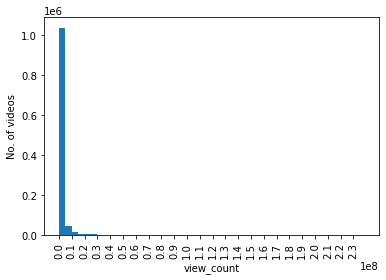

In [12]:
fig, ax = plt.subplots()
x = sns.distplot(df["view_count"], kde=False,hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
x = ax.set(xlabel="view_count", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
x = ax.set_xlim(right=2.5e8)
x = plt.xticks(rotation=90)

The majority of trending videos have less than 5 million views. Let's have a closer view at the histogram.

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


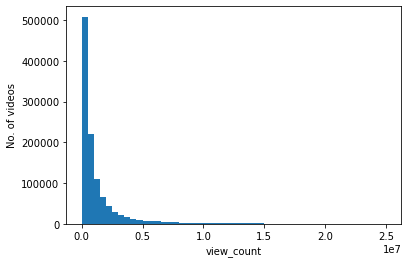

In [13]:
fig, ax = plt.subplots()
x = sns.distplot(df[df["view_count"] < 25e6]["view_count"], kde=False, hist_kws={'alpha': 1}, ax=ax)
x = ax.set(xlabel="view_count", ylabel="No. of videos")

Now we see that the majority of trending videos have 1 million views or less. Let's see the exact percentage of videos less than 1 million views

In [14]:
df[df['view_count'] < 1e6]['view_count'].count() / df['view_count'].count() * 100

65.1129956132272

### Likes histogram

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


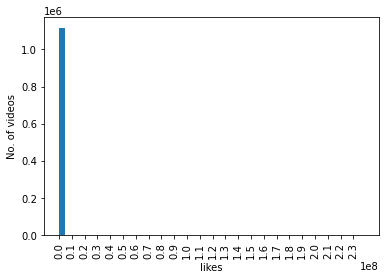

In [15]:
fig, ax = plt.subplots()
x = sns.distplot(df["likes"], kde=False,hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
x = ax.set(xlabel="likes", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
x = ax.set_xlim(right=2.5e8)
x = plt.xticks(rotation=90)

In [16]:
df[df['likes']<=1000000].count()

video_id             1097685
title                1097685
publishedAt          1097685
channelId            1097685
channelTitle         1097684
categoryId           1097685
trending_date        1097685
tags                 1097685
view_count           1097685
likes                1097685
dislikes             1097685
comment_count        1097685
thumbnail_link       1097685
comments_disabled    1097685
ratings_disabled     1097685
description          1097685
country              1097685
dtype: int64

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


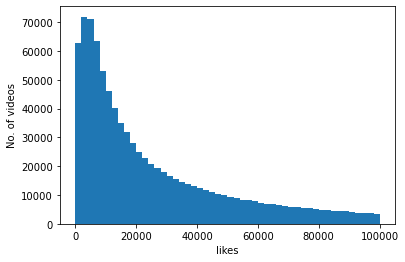

In [17]:
fig, ax = plt.subplots()
x = sns.distplot(df[df["likes"] < 1e5]["likes"], kde=False, hist_kws={'alpha': 1}, ax=ax)
x = ax.set(xlabel="likes", ylabel="No. of videos")

Let's check the percentage of trending videos less than 400,000 likes.

In [18]:
df[df['likes'] < 4e4]['likes'].count() / df['likes'].count() * 100

61.14209889105674

### Comments histogram

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


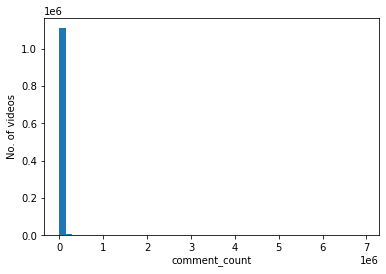

In [19]:
fig, ax = plt.subplots()
x = sns.distplot(df["comment_count"], kde=False, rug=False, hist_kws={'alpha': 1}, ax=ax)
x = ax.set(xlabel="comment_count", ylabel="No. of videos")

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


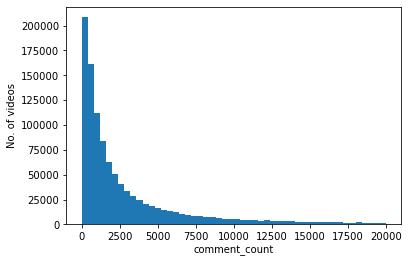

In [20]:
fig, ax = plt.subplots()
x = sns.distplot(df[df["comment_count"] < 2e4]["comment_count"], kde=False, hist_kws={'alpha': 1}, ax=ax)
x = ax.set(xlabel="comment_count", ylabel="No. of videos")

In [21]:
df[df['comment_count'] < 5000]['comment_count'].count() / df['comment_count'].count() * 100

76.4463563676162

### Non-numerical columns

In [22]:
df.describe(include = ['O'])

,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,thumbnail_link,description,country
count,1118362,1118362,1118362,1118362,1118361,1118362,1118362,1118362,1118362,1118362
unique,207157,210257,195339,30205,31034,493,145682,207166,197607,11
top,2IkoKhr6Tss,Starlink Mission,2021-06-04T04:00:11Z,UCLkAepWjdylmXSltofFvsYQ,BANGTANTV,2021-03-02T00:00:00Z,[None],https://i.ytimg.com/vi/2IkoKhr6Tss/default.jpg,,GB
freq,151,340,172,2854,2854,4398,166360,151,27746,102595


### Looking the Views, likes, dislikes distribuition by category_name

In [23]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e...",BR
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR
2,3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10T14:59:00Z,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...,BR
3,gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11T15:00:09Z,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,20,2020-08-12T00:00:00Z,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,242,2748,https://i.ytimg.com/vi/gBjox7vn3-g/default.jpg,False,False,Você se unirá aos Lunari e aos Solari em Targo...,BR
4,npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11T20:04:02Z,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,23,2020-08-12T00:00:00Z,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,3972,2751,https://i.ytimg.com/vi/npoUGx7UW7o/default.jpg,False,False,Danilo Gentili recebe Thammy Miranda. Após pas...,BR


Let's create category_name column by using Youtube Video Categories List.

In [24]:
df['category_name'] = np.nan

df.loc[(df["categoryId"] == 1),"category_name"] = 'Film and Animation'
df.loc[(df["categoryId"] == 2),"category_name"] = 'Cars and Vehicles'
df.loc[(df["categoryId"] == 10),"category_name"] = 'Music'
df.loc[(df["categoryId"] == 15),"category_name"] = 'Pets and Animals'
df.loc[(df["categoryId"] == 17),"category_name"] = 'Sport'
df.loc[(df["categoryId"] == 19),"category_name"] = 'Travel and Events'
df.loc[(df["categoryId"] == 20),"category_name"] = 'Gaming'
df.loc[(df["categoryId"] == 22),"category_name"] = 'People and Blogs'
df.loc[(df["categoryId"] == 23),"category_name"] = 'Comedy'
df.loc[(df["categoryId"] == 24),"category_name"] = 'Entertainment'
df.loc[(df["categoryId"] == 25),"category_name"] = 'News and Politics'
df.loc[(df["categoryId"] == 26),"category_name"] = 'How to and Style'
df.loc[(df["categoryId"] == 27),"category_name"] = 'Education'
df.loc[(df["categoryId"] == 28),"category_name"] = 'Science and Technology'
df.loc[(df["categoryId"] == 29),"category_name"] = 'Non Profits and Activism'
df.loc[(df["categoryId"] == 25),"category_name"] = 'News & Politics'

Category Name count
Entertainment       293567
Music               183045
People and Blogs    131971
Gaming              118926
Sport               113760
Name: category_name, dtype: int64


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


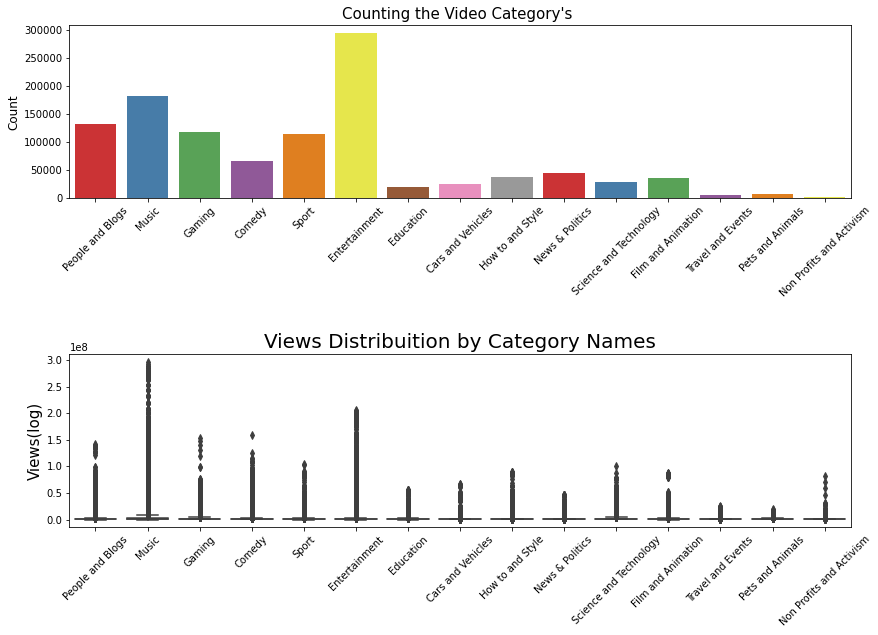

In [25]:
print("Category Name count")
print(df['category_name'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('category_name', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.subplot(212)
g1 = sns.boxplot(x='category_name', y='view_count', data=df, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

We should use log view for a closer look.

In [26]:
df['likes_log'] = np.log(df['likes'] + 1)
df['views_log'] = np.log(df['view_count'] + 1)
df['dislikes_log'] = np.log(df['dislikes'] + 1)
df['comment_log'] = np.log(df['comment_count'] + 1)

Category Name count
Entertainment       293567
Music               183045
People and Blogs    131971
Gaming              118926
Sport               113760
Name: category_name, dtype: int64


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


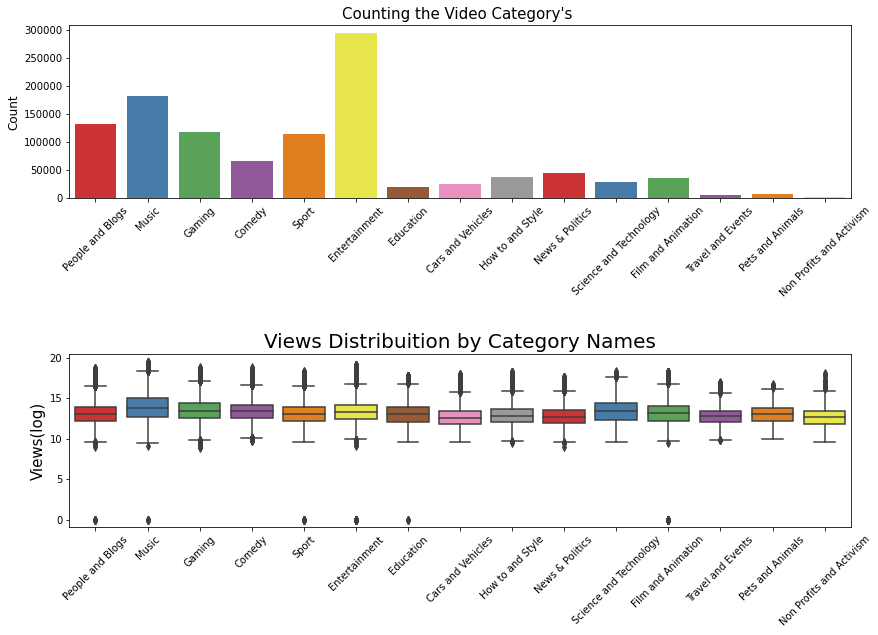

In [27]:
print("Category Name count")
print(df['category_name'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('category_name', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.subplot(212)
g1 = sns.boxplot(x='category_name', y='views_log', data=df, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

### We can note that:
1. There is a significant numbers of views on Music and Entertainment.
2. Non Profits and Activism seem to have least views.

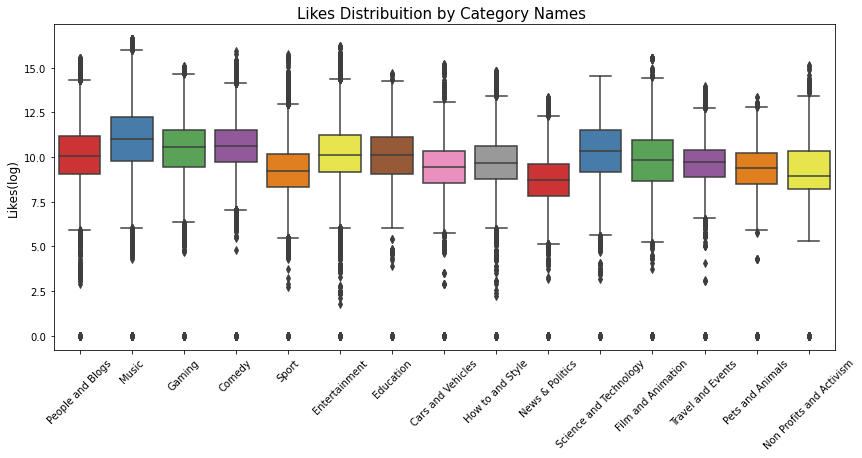

In [28]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='likes_log', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Likes Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)
plt.show()

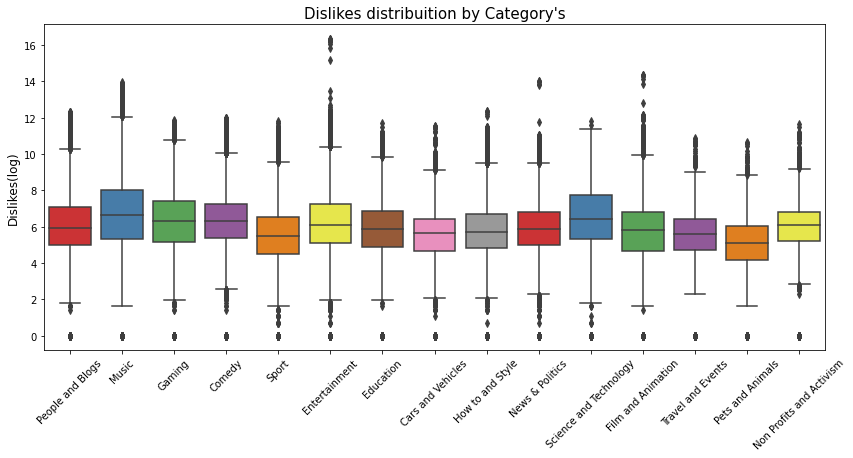

In [29]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='dislikes_log', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Dislikes distribuition by Category's", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Dislikes(log)", fontsize=12)
plt.show()

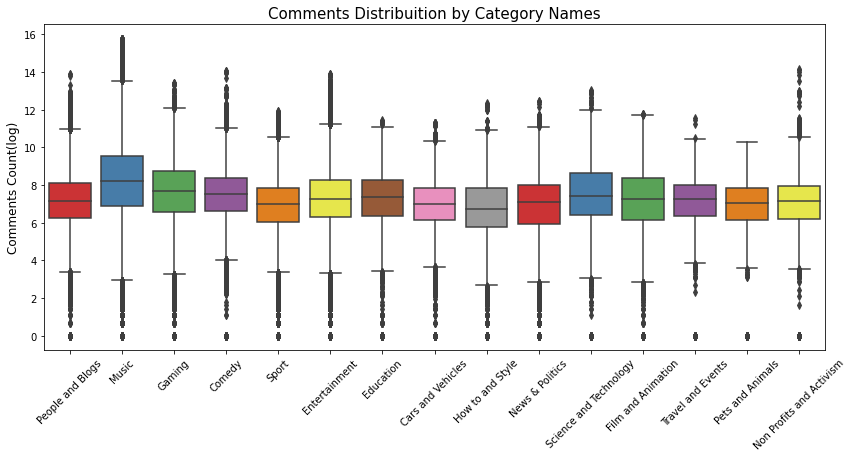

In [30]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='comment_log', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Comments Distribuition by Category Names", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Comments Count(log)", fontsize=12)

plt.show()

### Correlation

In [31]:
df.corr()

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,likes_log,views_log,dislikes_log,comment_log
categoryId,1.000000,-0.082224,-0.102353,-0.014961,-0.069342,0.043388,-0.027504,-0.051158,-0.068278,-0.020020,-0.095649
view_count,-0.082224,1.000000,0.849697,0.250078,0.639647,-0.003433,-0.000924,0.362725,0.531154,0.338434,0.336841
likes,-0.102353,0.849697,1.000000,0.213877,0.754273,-0.021923,-0.033576,0.416331,0.463282,0.327712,0.391229
dislikes,-0.014961,0.250078,0.213877,1.000000,0.207830,0.000520,-0.008127,0.089797,0.119032,0.124223,0.087976
comment_count,-0.069342,0.639647,0.754273,0.207830,1.000000,-0.013321,-0.008569,0.176247,0.209670,0.158946,0.227945
comments_disabled,0.043388,-0.003433,-0.021923,0.000520,-0.013321,1.000000,0.180063,-0.150145,-0.032812,-0.049375,-0.484028
ratings_disabled,-0.027504,-0.000924,-0.033576,-0.008127,-0.008569,0.180063,1.000000,-0.602293,-0.021470,-0.349095,-0.115266
likes_log,-0.051158,0.362725,0.416331,0.089797,0.176247,-0.150145,-0.602293,1.000000,0.666627,0.660900,0.627340
views_log,-0.068278,0.531154,0.463282,0.119032,0.209670,-0.032812,-0.021470,0.666627,1.000000,0.594790,0.623125
dislikes_log,-0.020020,0.338434,0.327712,0.124223,0.158946,-0.049375,-0.349095,0.660900,0.594790,1.000000,0.490351


<AxesSubplot:>

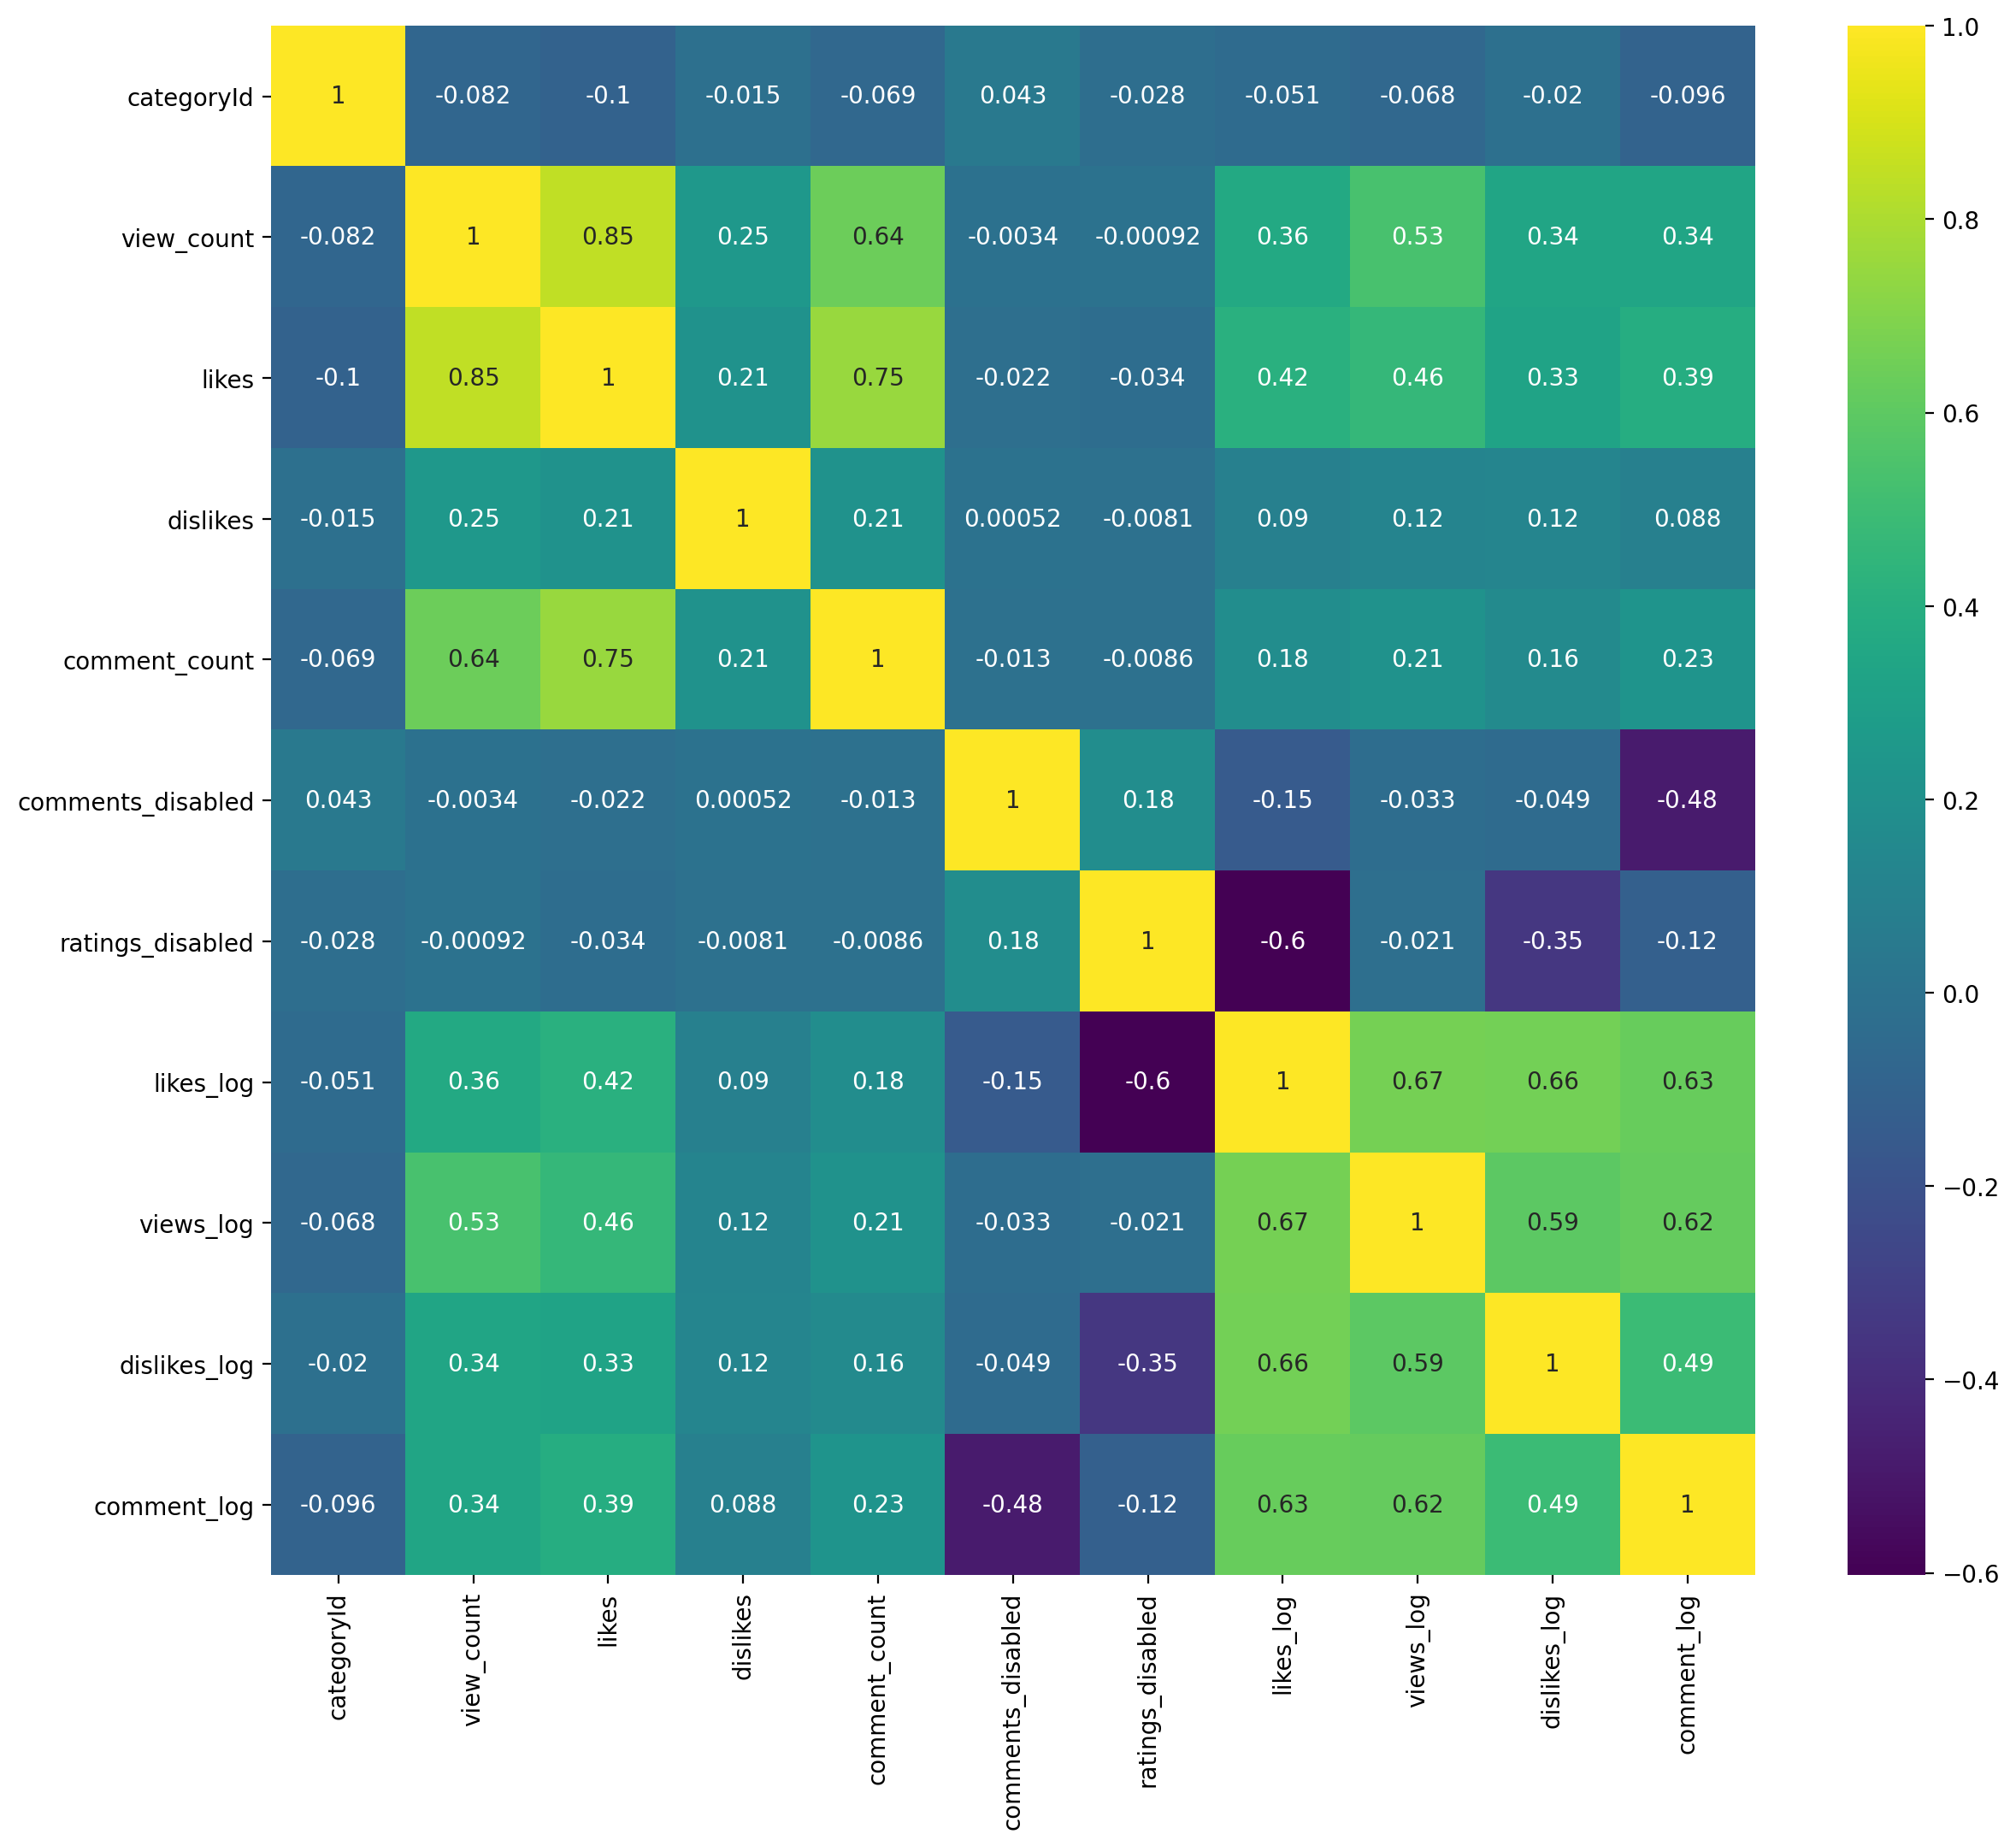

In [32]:
plt.figure(figsize=(14,12),dpi=200)
sns.heatmap(df.corr(),annot=True,cmap='viridis')

Views and likes are highly positively correlated.

<AxesSubplot:xlabel='view_count', ylabel='likes'>

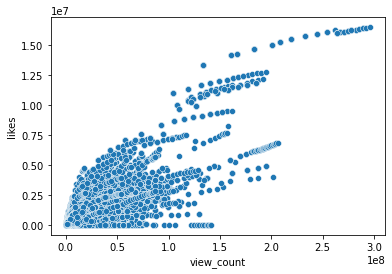

In [33]:
sns.scatterplot(x='view_count',y='likes',data=df)

Likes and comment_count correlation

<AxesSubplot:xlabel='comment_count', ylabel='likes'>

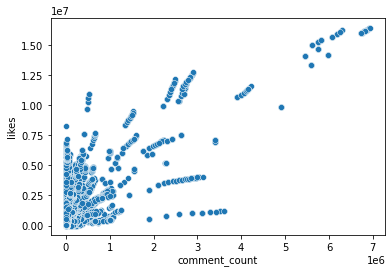

In [34]:
sns.scatterplot(x='comment_count',y='likes',data=df)

## **Now let's answer some analysis questions**

In [35]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'country', 'category_name',
       'likes_log', 'views_log', 'dislikes_log', 'comment_log'],
      dtype='object')

### Q1: What are the most common words in video titles?

In [36]:
title_words = list(df['title'].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]

In [37]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,thumbnail_link,comments_disabled,ratings_disabled,description,country,category_name,likes_log,views_log,dislikes_log,comment_log
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,...,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e...",BR,People and Blogs,11.351535,12.483083,6.190315,8.412055
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,...,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR,Music,13.479074,15.607282,9.627536,10.343064
2,3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10T14:59:00Z,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,...,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...,BR,People and Blogs,10.590667,14.647005,8.609772,0.000000
3,gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11T15:00:09Z,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,20,2020-08-12T00:00:00Z,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,...,https://i.ytimg.com/vi/gBjox7vn3-g/default.jpg,False,False,Você se unirá aos Lunari e aos Solari em Targo...,BR,Gaming,10.741233,12.613240,5.493061,7.918992
4,npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11T20:04:02Z,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,23,2020-08-12T00:00:00Z,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,...,https://i.ytimg.com/vi/npoUGx7UW7o/default.jpg,False,False,Danilo Gentili recebe Thammy Miranda. Após pas...,BR,Comedy,10.001521,12.698437,8.287277,7.920083


In [38]:
title_words

['LEVEI',
 'UM',
 'FORA?',
 'FINGI',
 'ESTAR',
 'APAIXONADO',
 'POR',
 'ELA!',
 'ITZY',
 '“Not',
 'Shy”',
 'M/V',
 'TEASER',
 'Oh',
 'Juliana',
 'PARÓDIA',
 '-',
 'MC',
 'Niack',
 'Contos',
 'de',
 'Runeterra:',
 'Targon',
 '|',
 'A',
 'Estrada',
 'Tortuosa',
 'Entrevista',
 'com',
 'Thammy',
 'Miranda',
 '|',
 'The',
 'Noite',
 '(10/08/20)',
 'DICAS',
 'DA',
 'RODADA',
 '2',
 '|',
 'CARTOLA',
 'FC',
 '2020:',
 'BORA',
 'MITAR',
 'E',
 'ACUMULAR',
 'CARTOLETAS!',
 'LIVE',
 'PLAYLIST',
 'DA',
 'TAY.',
 'PEDI',
 'ELA',
 'EM',
 'NAMORO?',
 'FIZ',
 'UM',
 'JANTAR',
 'ROMÂNTICO',
 'PRA',
 'ELA!',
 'AO',
 'VIVO',
 '-',
 'Apresentação',
 'do',
 'meia',
 'Carlinhos',
 'e',
 'bate-papo',
 'com',
 'Ricardo',
 'MASTERCHEF',
 'BRASIL',
 '(11/08/2020)',
 '|',
 'PARTE',
 '2',
 '|',
 'EP',
 '05',
 '|',
 'TEMP',
 '07',
 'DIA',
 'DE',
 'FAZER',
 'COMPRAS',
 'DO',
 'MES!!',
 'Kemilly',
 'Santos,',
 'Anderson',
 'Freire',
 '-',
 'Presença',
 'Isadora',
 'Pompeo',
 'e',
 'João',
 'Figueiredo',
 '-',
 'Más

In [39]:
from collections import Counter

In [40]:
Counter(title_words).most_common(25)

[('|', 385617),
 ('-', 285882),
 ('The', 55345),
 ('&', 52592),
 ('de', 49903),
 ('A', 39316),
 ('2021', 38156),
 ('(Official', 36973),
 ('the', 36854),
 ('Video)', 35633),
 ('a', 34673),
 ('I', 33740),
 ('in', 32073),
 ('DE', 31207),
 ('to', 27027),
 ('/', 26831),
 ('of', 25312),
 ('2', 23506),
 ('!', 23102),
 ('2020', 22332),
 ('vs', 22114),
 ('#shorts', 20013),
 ('Music', 19305),
 ('and', 18849),
 ('||', 18846)]

Let's make a wordcloud for this top 25 most common words.

In [41]:
import wordcloud

(-0.5, 1199.5, 599.5, -0.5)

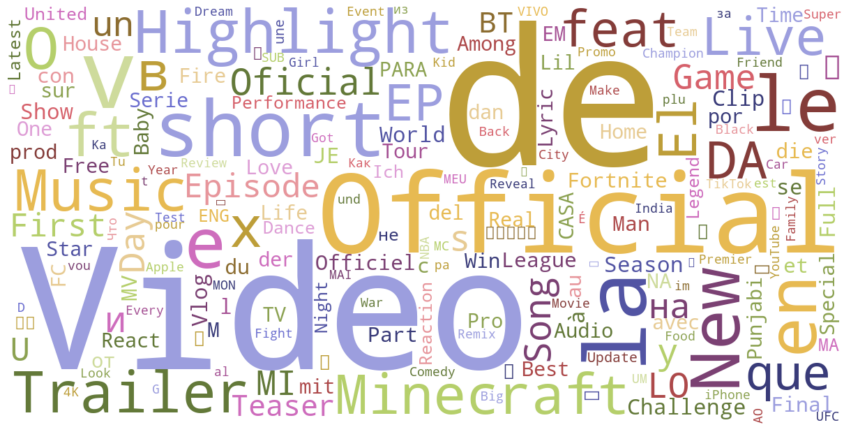

In [42]:
wc = wordcloud.WordCloud(width=1200,height=600,collocations=False,background_color='white',colormap='tab20b').generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')

### Q2: Which channels have the largest number of trending videos?

In [43]:
num_of_trending_videos = df.groupby('channelTitle').size().reset_index(name='video_count').sort_values('video_count',ascending=False)
num_of_trending_videos.head(10)

,channelTitle,video_count
2120,BANGTANTV,2854
18723,SMTOWN,2500
10037,JYP Entertainment,2218
2247,BLACKPINK,2062
7012,FORMULA 1,1682
15207,NFL,1546
8850,HYBE LABELS,1534
28935,東海オンエア,1428
19720,Sky Sports Football,1423
15138,NBA,1420


D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26481 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28023 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12458 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12450 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-package

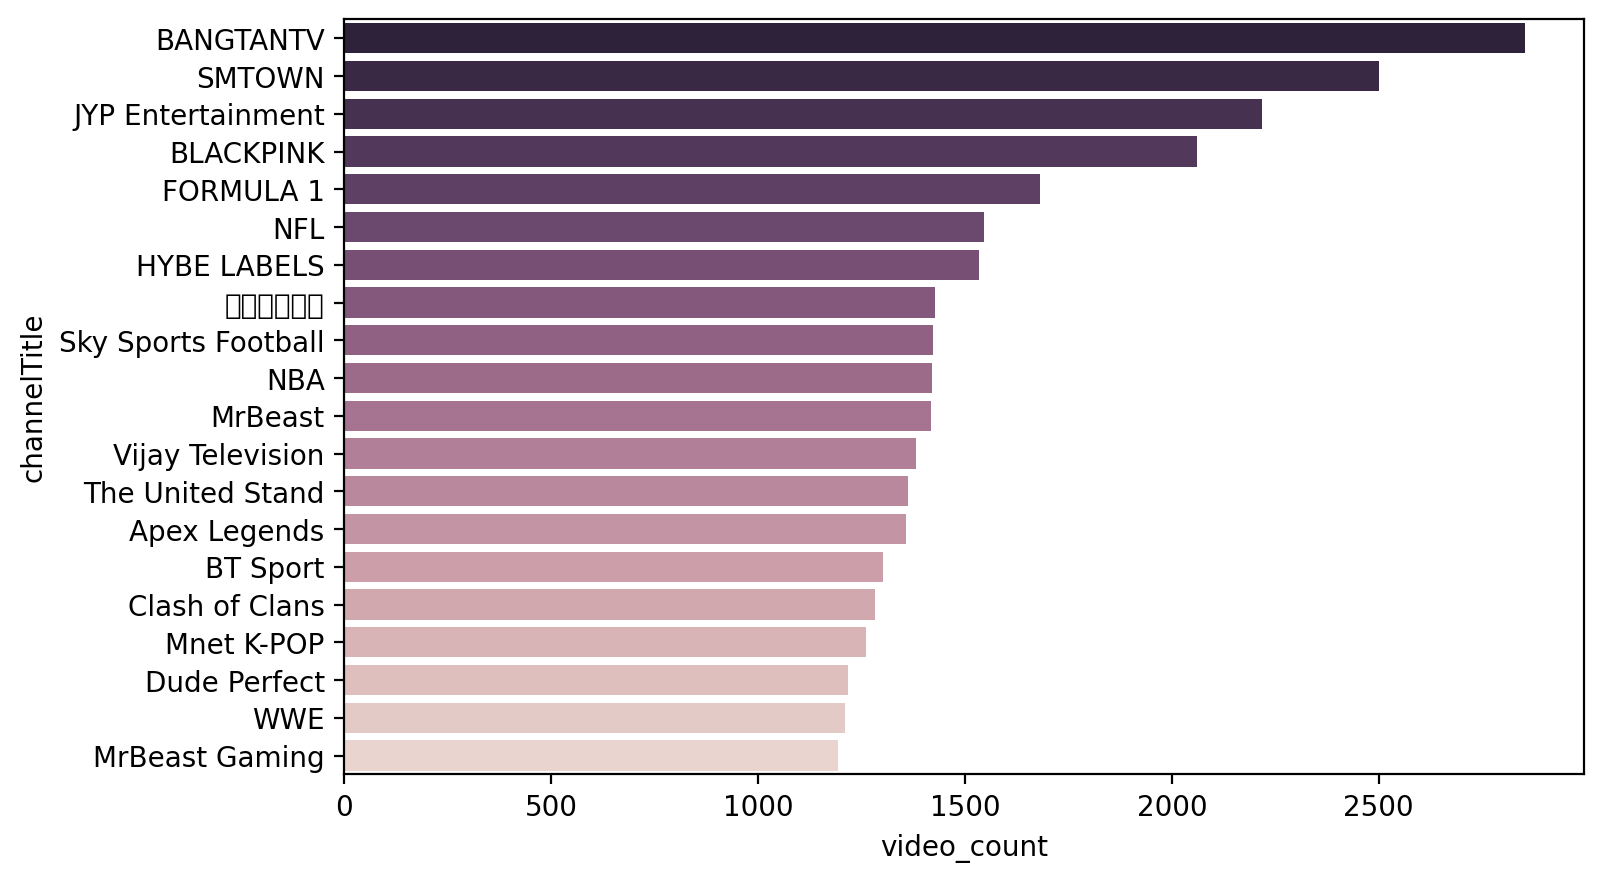

In [44]:
plt.figure(figsize=(8,5),dpi=200)
sns.barplot(x="video_count", y="channelTitle", data=num_of_trending_videos.head(20),palette=sns.cubehelix_palette(n_colors=20, reverse=True))
plt.show()

### Q3: Which video category has the largest number of trending videos?

In [45]:
cat_num_of_trending_videos = df.groupby('category_name').size().reset_index(name='video_count').sort_values('video_count',ascending=False)
cat_num_of_trending_videos

,category_name,video_count
3,Entertainment,293567
7,Music,183045
10,People and Blogs,131971
5,Gaming,118926
13,Sport,113760
1,Comedy,66620
8,News & Politics,44712
6,How to and Style,37166
4,Film and Animation,35680
12,Science and Technology,29865


<function matplotlib.pyplot.show(close=None, block=None)>

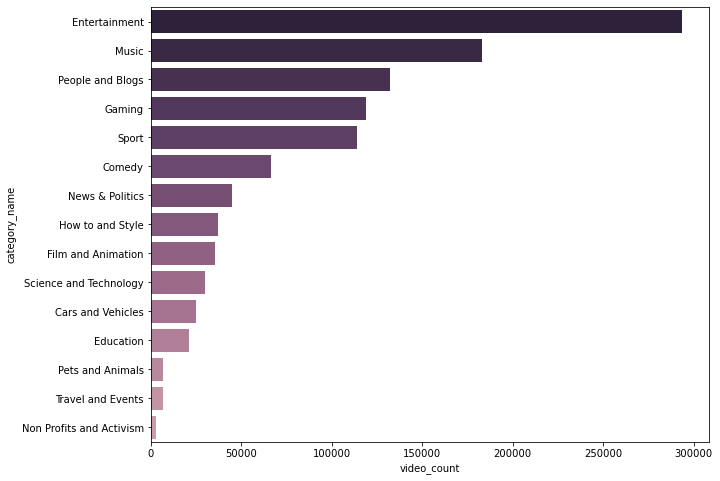

In [46]:
plt.figure(figsize=(10,8))
sns.barplot(x="video_count", y="category_name", data=cat_num_of_trending_videos,palette=sns.cubehelix_palette(n_colors=20, reverse=True))
plt.show

### Q4: Which day in week and time in day has the largest number of uploaded trending videos?

In [47]:
import datetime

In [48]:
df['publishing_day'] = df['publishedAt'].apply(lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df['publishing_hour'] = df['publishedAt'].apply(lambda x: x[11:13])
df.drop(labels='publishedAt', axis=1, inplace=True)

<AxesSubplot:xlabel='publishing_day', ylabel='No_of_videos'>

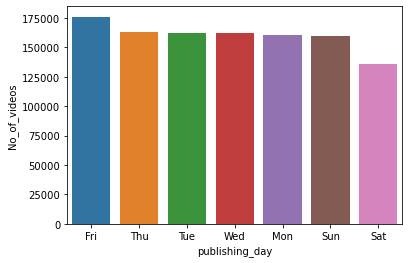

In [49]:
num_of_trending_video_day_in_week = df["publishing_day"].value_counts().to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
sns.barplot(x="publishing_day", y="No_of_videos", data=num_of_trending_video_day_in_week)

<AxesSubplot:xlabel='publishing_hour', ylabel='No_of_videos'>

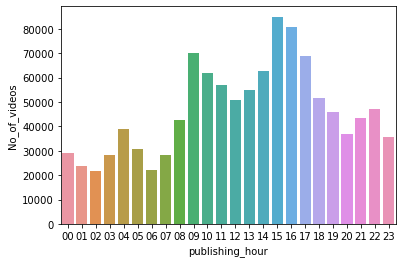

In [50]:
num_of_trending_video_time_in_day = df["publishing_hour"].value_counts().to_frame().reset_index().rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
num_of_trending_video_time_in_day = num_of_trending_video_time_in_day.sort_values('publishing_hour')
sns.barplot(x="publishing_hour", y="No_of_videos", data=num_of_trending_video_time_in_day)

We can see that the period between 9AM and 5PM had the largest number of video uploaded.

### Q5: How many trending videos have their comments disabled?

Text(0.5, 1.0, 'Comment Disabled')

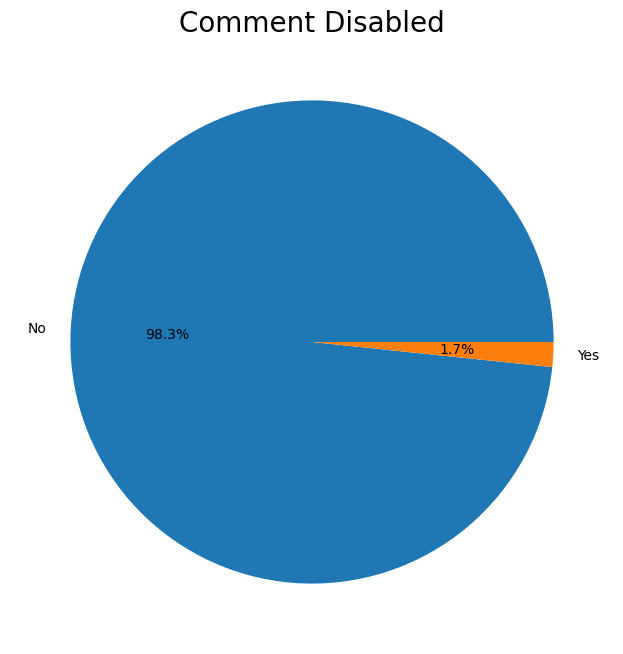

In [51]:
comment_disabled = df['comments_disabled'].value_counts()
plt.figure(figsize=(8,8),dpi=100)
plt.pie(x=[comment_disabled[False],comment_disabled[True]],labels=['No','Yes'],autopct='%.1f%%')
plt.title('Comment Disabled',fontsize=20)

### Q6: How many trending videos have their ratings disabled?

Text(0.5, 1.0, 'Rating Disabled')

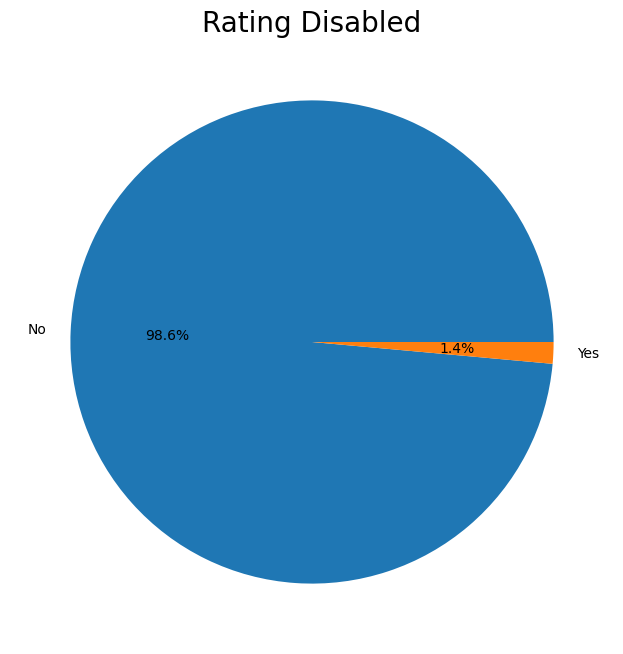

In [52]:
rating_disabled = df['ratings_disabled'].value_counts()
plt.figure(figsize=(8,8),dpi=100)
plt.pie(x=[rating_disabled[False],rating_disabled[True]],labels=['No','Yes'],autopct='%.1f%%')
plt.title('Rating Disabled',fontsize=20)

In [53]:
df.columns

Index(['video_id', 'title', 'channelId', 'channelTitle', 'categoryId',
       'trending_date', 'tags', 'view_count', 'likes', 'dislikes',
       'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'country', 'category_name',
       'likes_log', 'views_log', 'dislikes_log', 'comment_log',
       'publishing_day', 'publishing_hour'],
      dtype='object')

### Q7: How many likes, dislikes, views and comments get by different countries?

In [61]:
group_by_country = df.groupby('country').sum().reset_index()

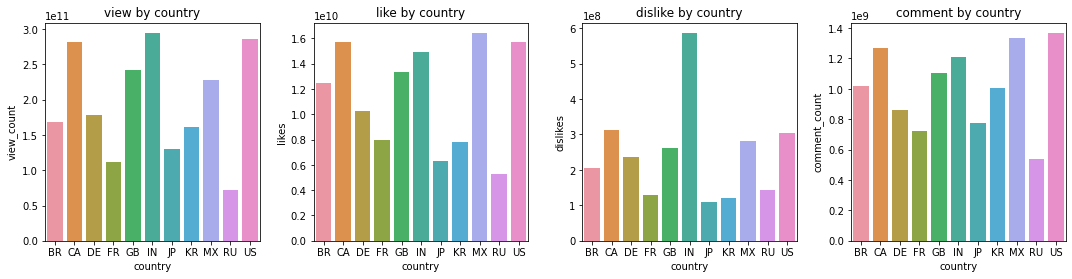

In [66]:
plt.figure(figsize=(15,18))
plt.subplot(5,4,1)
sns.barplot(x='country',y='view_count',data=group_by_country)
plt.title('view by country')
plt.subplot(5,4,2)
sns.barplot(x='country',y='likes',data=group_by_country)
plt.title('like by country')
plt.subplot(5,4,3)
sns.barplot(x='country',y='dislikes',data=group_by_country)
plt.title('dislike by country')
plt.subplot(5,4,4)
sns.barplot(x='country',y='comment_count',data=group_by_country)
plt.title('comment by country')
plt.tight_layout()
plt.show()

### Q8: Users like videos from which CATEGORY the most?

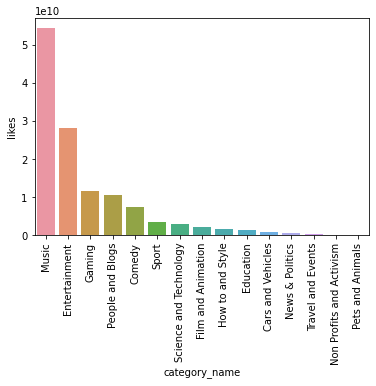

In [71]:
cat_like_most = df.groupby('category_name').sum()['likes'].reset_index().sort_values('likes',ascending=False)
sns.barplot(x='category_name',y='likes',data=cat_like_most)
plt.xticks(rotation=90)
plt.show()

Top category is Music

## **Conclusions**

1. The average number of views of a trending video is 1,925,744. The median value for the number of views is 583,188.5.
2. The average number of likes of a trending video is 112,763.7 while the average number of dislikes is 2,403.759.
3. Average comment count is 10,023.59 and the median is 1,560.
4. The minimum number of views, likes, dislikes and comments is 0. Those videos maybe newly uploaded.
5. More than 65% of trending videos have less than 1,000,000 views.
6. More than 61% of trending videos have less than 40,000 likes.
7. More than 76% of trending videos have less than 4,000 comments.
8. Entertainment has the largest number of trending videos, but Music is the one which has the largest number of likes.
9. The delimiters - and | were common in trending video titles.
10. The words 'Official', 'Video', '#shorts', 'Music', '2020' and '2021' were common also in trending video titles.
11. Music is the category that has the largest number of likes, it explains why the word 'Music' is common in trending video titles.
12. Youtube Shorts was publish in 2020, it has the similar control operation as TikTok and Instagram Reels. That makes Youtube Shorts becomes popular.
13. There is a strong positive correlation between the number of views and the number of likes of trending videos.